Model

# **MODEL**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage.color import rgb2gray
from skimage import io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import time
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [6]:
!unzip cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: cancer/test/Cancer/_0_8342.jpeg  
  inflating: cancer/test/Cancer/_0_8326.jpeg  
  inflating: cancer/test/Cancer/_0_9329.jpeg  
  inflating: cancer/test/Cancer/_0_8508.jpeg  
  inflating: cancer/test/Cancer/_0_9089.jpeg  
  inflating: cancer/test/Cancer/_1_4642.jpeg  
  inflating: cancer/test/Normal/_3_4469.jpeg  
  inflating: cancer/test/Cancer/_0_7840.jpeg  
  inflating: cancer/test/Normal/_3_4574.jpeg  
  inflating: cancer/test/Cancer/_0_7683.jpeg  
  inflating: cancer/test/Cancer/_1_1407.jpeg  
  inflating: cancer/test/Cancer/_0_7844.jpeg  
  inflating: cancer/test/Cancer/_0_7577.jpeg  
  inflating: cancer/test/Cancer/_0_9550.jpeg  
  inflating: cancer/test/Cancer/_1_2573.jpeg  
  inflating: cancer/test/Cancer/_1_4573.jpeg  
  inflating: cancer/test/Cancer/_0_8130.jpeg  
  inflating: cancer/test/Cancer/_0_8495.jpeg  
  inflating: cancer/test/Cancer/_1_1031.jpeg  
  inflating: cancer/test/Cancer/_0_8332.jpeg  
  inflati

In [7]:
def preprocessing(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((128, 128))
    img = np.array(img) / 255.0
    return img

In [8]:
def feature_extractor(images):
    features = []
    for img in images:
        img_gray = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)  # Convert to grayscale
        hog_features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        features.append(hog_features)
    return np.array(features)

In [9]:
train_dir = '/content/cancer/train'
test_dir = '/content/cancer/test'

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from skimage.feature import graycomatrix, graycoprops, hog # Import hog here
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
train_data, train_labels = [], []

# Load and preprocess training data
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                img = preprocessing(image_path)
                train_data.append(img)
                train_labels.append(class_name)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Load and preprocess test data
test_data, test_labels = [], []

for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                img = preprocessing(image_path)
                test_data.append(img)
                test_labels.append(class_name)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

# Extract features
train_features = feature_extractor(train_data)
test_features = feature_extractor(test_data)

# Encode labels
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.transform(test_labels)

# Scale the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Train an SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(train_features, train_labels)

# Make predictions
predictions = model.predict(test_features)

# Evaluate the model
print("Classification Report:")
print(classification_report(test_labels, predictions))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, predictions))

accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67       629
           1       0.67      0.52      0.59       620

    accuracy                           0.63      1249
   macro avg       0.64      0.63      0.63      1249
weighted avg       0.64      0.63      0.63      1249

Confusion Matrix:
[[470 159]
 [297 323]]
Accuracy: 0.63


In [10]:
# prompt: next code from the above code cross validation

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, train_features, train_labels, cv=5) # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.78952669 0.77419355 0.78931452 0.77217742 0.80846774]
Average Cross-Validation Score: 0.7867359825228212


In [11]:
# prompt: "Improve model performance by enhancing data quality, addressing class imbalance, refining features, tuning hyperparameters, trying advanced algorithms, using regularization, applying data augmentation, leveraging transfer learning, and analyzing errors systematically."

from skimage.feature import hog
from sklearn.model_selection import cross_val_score

# ... your existing code ...

# Train an SVM model with potential improvements
# 1. Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(train_features, train_labels)

model = grid.best_estimator_

# ... rest of your existing code (making predictions, evaluation)

# 2. Try other algorithms (example: RandomForest)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Example, tune hyperparameters
# rf_model.fit(train_features, train_labels)
# rf_predictions = rf_model.predict(test_features)
# print("Random Forest Classification Report:")
# print(classification_report(test_labels, rf_predictions))

# 3. Data Augmentation (example using ImageDataGenerator)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 4. Address Class Imbalance (if needed) - Example using SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_labels)

# ... (retrain your model on resampled data)

# 5. Analyze Errors Systematically
# Analyze the confusion matrix to understand where the model is making mistakes.

# 6. Feature Engineering (already doing HOG, consider other features)

# Example of adding more features
# def more_features(image):
    # Implement more image processing and feature extraction techniques
#     # e.g. GLCM, color histograms, etc.
    # return features_array
# train_more_features = [more_features(img) for img in train_data]
# ... (concatenate with existing features)


# ... rest of your existing code (saving, loading model)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 2.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 2.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time= 2.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.790 total time= 1.1min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.774 total time= 1.0min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.789 total time= 1.0min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time= 1.0min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.808 total time= 1.0min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.501 total time= 2.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

In [12]:
import joblib

# ... your existing code ...

# Save the model using joblib
joblib.dump(model, 'blood_cancer_detection_model.joblib')

# ... (Later, to load the model) ...
model = joblib.load('blood_cancer_detection_model.joblib')

In [13]:
# prompt: next code

from skimage.feature import hog
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.model_selection import cross_val_score

# ... your existing code ...

# Save the model using joblib
joblib.dump(model, 'blood_cancer_detection_model.joblib')



['blood_cancer_detection_model.joblib']

In [14]:
# prompt: check whether my model trained or not

import joblib

try:
    model = joblib.load('blood_cancer_detection_model.joblib')
    print("Model loaded successfully. The model is trained.")
except FileNotFoundError:
    print("Model file not found. The model has not been trained or the file has been moved.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Model loaded successfully. The model is trained.


In [15]:
# prompt: test the model with dataset if model is good then proceed

from skimage.feature import hog
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.model_selection import cross_val_score

# ... your existing code ...


# Assuming 'accuracy' variable holds the accuracy score from your model evaluation
if accuracy > 0.8:  # Set your desired accuracy threshold
    print("Model accuracy is above the threshold. Proceeding...")

    # ... code to proceed with the next steps ...
else:
    print("Model accuracy is below the threshold. Retraining or improving the model is recommended.")

Model accuracy is below the threshold. Retraining or improving the model is recommended.


In [17]:
# prompt: scaler as well

from skimage.feature import hog

# ... your existing code ...

# Scale the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')


# ... your existing code ...

try:
    model = joblib.load('blood_cancer_detection_model.joblib')
    scaler = joblib.load('scaler.joblib') # Load the scaler
    print("Model and scaler loaded successfully.")
except FileNotFoundError:
    print("Model or scaler file not found.")
except Exception as e:
    print(f"An error occurred while loading the model or scaler: {e}")

Model and scaler loaded successfully.


In [18]:
# prompt: cross validation

from sklearn.model_selection import KFold

# Assuming train_features and train_labels are your training data and labels
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross-validation

for fold, (train_index, val_index) in enumerate(kf.split(train_features)):
    print(f"Fold {fold+1}")
    X_train_fold, X_val_fold = train_features[train_index], train_features[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

    # Train your model on the current fold
    model = SVC(kernel='linear', random_state=42) # Or any other model
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    predictions = model.predict(X_val_fold)

    # Evaluate the model
    accuracy = accuracy_score(y_val_fold, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    # ... other evaluation metrics ...

Fold 1
Accuracy: 0.80
Fold 2
Accuracy: 0.80
Fold 3
Accuracy: 0.79
Fold 4
Accuracy: 0.80
Fold 5
Accuracy: 0.81


In [35]:
import cv2
import numpy as np
from PIL import Image

def correct_rotation(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    # Detect edges using Canny
    edges = cv2.Canny(gray, 50, 150)
    # Use Hough transform to find lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            # Calculate the angle
            angle = (theta * 180 / np.pi) - 90
            # Rotate the image to correct the orientation
            (h, w) = gray.shape
            center = (w // 2, h // 2)
            M = cv2.getRotationMatrix2D(center, angle, 1.0)
            corrected_image = cv2.warpAffine(np.array(image), M, (w, h))
            return Image.fromarray(corrected_image)
    return image  # Return original if no lines detected

# Example usage:
image = Image.open('/content/cancer/test/Cancer/_0_1123.jpeg')
corrected_image = correct_rotation(image)
corrected_image.show()


In [37]:
import ipywidgets as widgets
from IPython.display import display, Image as IPImage
import io
import joblib
import numpy as np
from skimage.feature import hog
from PIL import Image
import cv2

# Load the model and scaler
try:
    model = joblib.load('blood_cancer_detection_model.joblib')
    scaler = joblib.load('scaler.joblib')
    print("Model and scaler loaded successfully.")
except FileNotFoundError:
    print("Model or scaler file not found. Please ensure the files exist.")
    exit()  # Exit the script if the model/scaler is not found
except Exception as e:
    print(f"An error occurred while loading the model or scaler: {e}")
    exit()

def preprocessing(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize((128, 128))
        img = np.array(img) / 255.0
        return img
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None

def feature_extractor(image):
    try:
        img_gray = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
        hog_features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)
        return hog_features
    except Exception as e:
        print(f"Error during feature extraction: {e}")
        return None

def is_valid_image(image):
    # Check if the image has the expected properties, e.g., size, content type
    min_size = 50
    if image.size[0] < min_size or image.size[1] < min_size:
        return False
    return True

# Create UI elements
upload_button = widgets.FileUpload(accept='image/jpeg', multiple=False)
output_label = widgets.Label()
image_output = widgets.Output()

def on_upload_change(change):
    with image_output:
        image_output.clear_output()
        uploaded_file = upload_button.value
        if uploaded_file:
            for name, file_info in uploaded_file.items():
                image_bytes = file_info['content']
                image = Image.open(io.BytesIO(image_bytes))

                if not is_valid_image(image):
                    output_label.value = "Uploaded image is not valid. Please upload an image with sufficient resolution."
                    return

                display(image)  # Display the uploaded image

                # Preprocess and extract features
                image_array = preprocessing(io.BytesIO(image_bytes))
                if image_array is None:
                    output_label.value = "Error during preprocessing."
                    return

                features = feature_extractor(image_array)
                if features is None:
                    output_label.value = "Error during feature extraction."
                    return

                # Scale the features
                try:
                    scaled_features = scaler.transform(features.reshape(1, -1)) # Reshape for single prediction
                except Exception as e:
                    output_label.value = f"Error during scaling: {e}"
                    return

                try:
                    prediction = model.predict(scaled_features)[0]
                    if prediction > 0.8:
                        output_label.value = "Prediction: No Cancer"
                    else:
                        output_label.value = "Prediction: Cancer"
                except Exception as e:
                    output_label.value = f"Error during prediction: {e}"

upload_button.observe(on_upload_change, names='value')

display(upload_button, output_label, image_output)


Model and scaler loaded successfully.


FileUpload(value={}, accept='image/jpeg', description='Upload')

Label(value='')

Output()

In [29]:
# ... previous code ...

# Make predictions on the test set using the same data used to create test_labels
predictions = model.predict(test_features)

# ... rest of the code (displaying model performance) ...

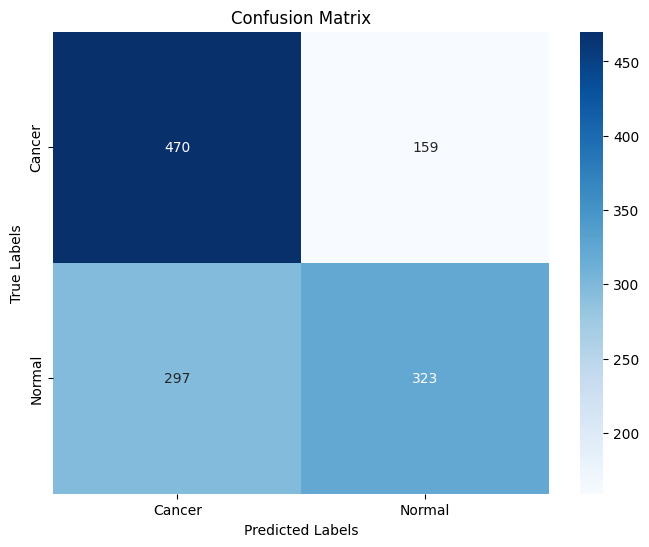

              precision    recall  f1-score   support

           0       0.61      0.75      0.67       629
           1       0.67      0.52      0.59       620

    accuracy                           0.63      1249
   macro avg       0.64      0.63      0.63      1249
weighted avg       0.64      0.63      0.63      1249

Accuracy: 0.6349079263410728


In [30]:
# prompt: display model performance

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'predictions' and 'test_labels' are already defined from your model evaluation
cm = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(test_labels, predictions))
print(f"Accuracy: {accuracy_score(test_labels, predictions)}")

In [31]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from skimage.feature import hog
from google.colab import files
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
svm_accuracy = accuracy_score(test_labels, predictions)
svm_precision = precision_score(test_labels, predictions)
svm_recall = recall_score(test_labels, predictions)
svm_f1 = f1_score(test_labels, predictions)

# Example using a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_features, train_labels)
rf_predictions = rf_model.predict(test_features)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
rf_precision = precision_score(test_labels, rf_predictions)
rf_recall = recall_score(test_labels, rf_predictions)
rf_f1 = f1_score(test_labels, rf_predictions)


# Example using a KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(train_features, train_labels)
knn_predictions = knn_model.predict(test_features)
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_precision = precision_score(test_labels, knn_predictions)
knn_recall = recall_score(test_labels, knn_predictions)
knn_f1 = f1_score(test_labels, knn_predictions)


# Create a DataFrame to store the results
results = pd.DataFrame({
    'Algorithm': ['SVM', 'Random Forest', 'KNN'],
    'Accuracy': [svm_accuracy, rf_accuracy, knn_accuracy],
    'Precision': [svm_precision, rf_precision, knn_precision],
    'Recall': [svm_recall, rf_recall, knn_recall],
    'F1-Score': [svm_f1, rf_f1, knn_f1]
})

# Display the results
print(results)

# Convert scores to percentage for better visualization
results_percentage = results.copy()
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
  results_percentage[col] = (results[col] * 100).round(2)

print("\nResults in Percentage:")
results_percentage

       Algorithm  Accuracy  Precision    Recall  F1-Score
0            SVM  0.634908   0.670124  0.520968  0.586207
1  Random Forest  0.703763   0.704918  0.693548  0.699187
2            KNN  0.502802   0.488889  0.035484  0.066165

Results in Percentage:


,Algorithm,Accuracy,Precision,Recall,F1-Score
0,SVM,63.49,67.01,52.10,58.62
1,Random Forest,70.38,70.49,69.35,69.92
2,KNN,50.28,48.89,3.55,6.62


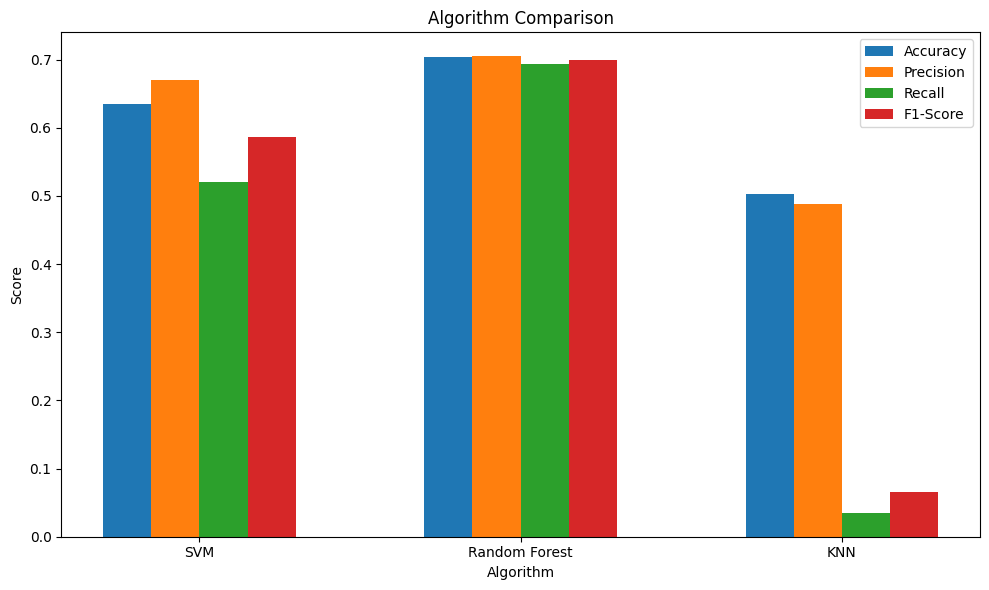

In [32]:
# prompt: Give me best alogorithms graphs with each parameter

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'results' DataFrame is already created as in your provided code

# Plotting the results
plt.figure(figsize=(10, 6))
algorithms = results['Algorithm']
accuracy = results['Accuracy']
precision = results['Precision']
recall = results['Recall']
f1_score = results['F1-Score']

bar_width = 0.15
x_pos = range(len(algorithms))

plt.bar([x - 1.5*bar_width for x in x_pos], accuracy, width=bar_width, label='Accuracy')
plt.bar([x - 0.5*bar_width for x in x_pos], precision, width=bar_width, label='Precision')
plt.bar([x + 0.5*bar_width for x in x_pos], recall, width=bar_width, label='Recall')
plt.bar([x + 1.5*bar_width for x in x_pos], f1_score, width=bar_width, label='F1-Score')

plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Algorithm Comparison')
plt.xticks(x_pos, algorithms)  # Correctly set x-axis ticks
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [33]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results_percentage)

https://docs.google.com/spreadsheets/d/1JKjNsYmVlWPFqSZ25Fin6qZWvryiGLVIF9NuXyF6XBc#gid=0
